# Polynomial regression on house sales data

### Fire up Graphlab Create

In [1]:
import graphlab

### Polynomial sframe function

In [2]:
#Create an SFrame consisting of the powers of an SArray up to a specific degree:
def polynomial_sframe(feature, degree):
    
    poly_sframe = graphlab.SFrame() # creates an empty sframe
    
    poly_sframe['power_1'] = feature # set the feature sarray as the first column of the sframe
  
    if degree > 1: # first check if degree > 1
        for power in range(2, degree + 1): 
            
            name = 'power_' + str(power) # name the column according to the degree
            
            poly_sframe[name] = feature.apply(lambda x : x**power ) #assign poly_sframe[name] to the appropriate power of feature

    return poly_sframe

Test the function

In [3]:
tmp = graphlab.SArray([1., 2., 3.])
print polynomial_sframe(tmp, 3)

This non-commercial license of GraphLab Create for academic use is assigned to agrawal.pr@husky.neu.edu and will expire on March 12, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\agraw\AppData\Local\Temp\graphlab_server_1504899546.log.0


+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



### Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

### Load in house sales data

In [5]:
sales = graphlab.SFrame('kc_house_data.gl/')

### Explore house sales data

In [6]:
sales[0:1]

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 1

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 | 221900.0 |   3.0    |    1.0    |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    1180.0   |   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|       0       |   1955   |      0       |  98178  | 47.51123398 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
+---------------+---------------+-----+
[1 rows x 21 columns]

Going to use the **sqft_living** variable. For plotting purposes (connecting the dots), we need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [9]:
sales = sales.sort(['sqft_living', 'price'])

### Degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [13]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [14]:
poly1_data

Columns:
	power_1	float
	price	float

Rows: 21613

Data:
+---------+----------+
| power_1 |  price   |
+---------+----------+
|  290.0  | 142000.0 |
|  370.0  | 276000.0 |
|  380.0  | 245000.0 |
|  384.0  | 265000.0 |
|  390.0  | 228000.0 |
|  390.0  | 245000.0 |
|  410.0  | 325000.0 |
|  420.0  | 229050.0 |
|  420.0  | 280000.0 |
|  430.0  | 80000.0  |
+---------+----------+
[21613 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [15]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.023837     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [16]:
model1.get("coefficients")

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -43579.0852515 | 4402.68969743 |
|   power_1   |  None | 280.622770886  | 1.93639855513 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

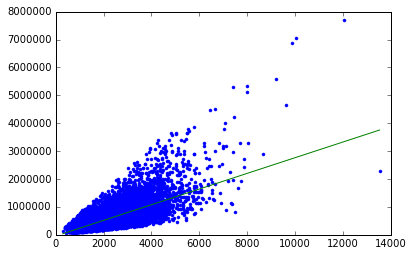

In [18]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

### Degreee two polynomial

In [19]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.007018     | 5913020.984255     | 250948.368758 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [20]:
model2.get("coefficients")

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 3

Data:
+-------------+-------+-----------------+-------------------+
|     name    | index |      value      |       stderr      |
+-------------+-------+-----------------+-------------------+
| (intercept) |  None |  199222.496445  |   7058.00483552   |
|   power_1   |  None |  67.9940640677  |   5.28787201316   |
|   power_2   |  None | 0.0385812312789 | 0.000898246547032 |
+-------------+-------+-----------------+-------------------+
[3 rows x 4 columns]

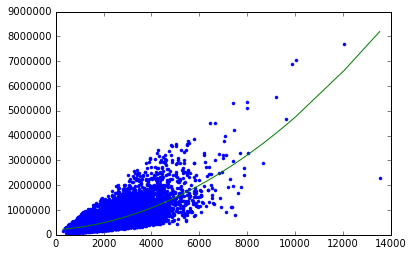

In [23]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

### Degree three polynomial

In [24]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_features = poly3_data.column_names()
poly3_data['price'] = sales['price']
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = poly3_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.012979     | 3261066.736007     | 249261.286346 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [25]:
model3.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 4

Data:
+-------------+-------+-------------------+------------------+
|     name    | index |       value       |      stderr      |
+-------------+-------+-------------------+------------------+
| (intercept) |  None |   336788.117952   |  10661.0153713   |
|   power_1   |  None |   -90.1476236119  |  10.6222891844   |
|   power_2   |  None |   0.087036715081  | 0.00296630623148 |
|   power_3   |  None | -3.8398521196e-06 | 2.2417490959e-07 |
+-------------+-------+-------------------+------------------+
[4 rows x 4 columns]

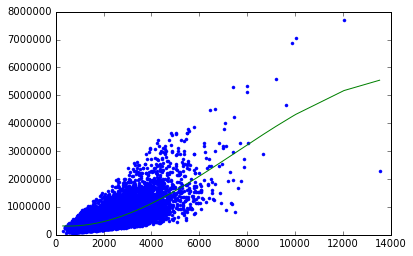

In [26]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

### 15th degree polynomial

In [27]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_features = poly15_data.column_names()
poly15_data['price'] = sales['price']
model4 = graphlab.linear_regression.create(poly15_data, target = 'price', features = poly15_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.015553     | 2662308.584338     | 245690.511190 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [29]:
model4.get("coefficients")

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+--------------------+--------+
|     name    | index |       value        | stderr |
+-------------+-------+--------------------+--------+
| (intercept) |  None |   73619.7521135    |  nan   |
|   power_1   |  None |   410.287462533    |  nan   |
|   power_2   |  None |  -0.230450714427   |  nan   |
|   power_3   |  None |  7.5884054245e-05  |  nan   |
|   power_4   |  None | -5.65701802663e-09 |  nan   |
|   power_5   |  None | -4.5702813057e-13  |  nan   |
|   power_6   |  None |  2.6636020643e-17  |  nan   |
|   power_7   |  None | 3.38584769284e-21  |  nan   |
|   power_8   |  None | 1.14723104081e-25  |  nan   |
|   power_9   |  None | -4.65293586088e-30 |  nan   |
+-------------+-------+--------------------+--------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

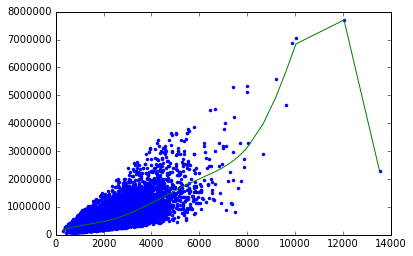

In [30]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model4.predict(poly15_data),'-')

### Changing the data and re-learning

Split the sales data into four subsets of roughly equal size. Then estimate a 15th degree polynomial model on all four subsets of the data.

In [35]:
(set_A, set_B) = sales.random_split(0.5, seed=0)

In [36]:
(set_1, set_2) = set_A.random_split(0.5, seed=0)

In [37]:
(set_3, set_4) = set_B.random_split(0.5, seed=0)

### Fitting a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices.

In [39]:
#set_1
poly_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
set_1_features = poly_set_1.column_names()
poly_set_1['price'] = set_1['price']
model_set_1 = graphlab.linear_regression.create(poly_set_1, target = 'price', features = set_1_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.008135     | 2195218.932304     | 248858.822200 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [42]:
model_set_1.get('coefficients').print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   223312.750249    |   835599.663129   |
|   power_1   |  None |   118.086127587    |   3486.76167789   |
|   power_2   |  None |  -0.0473482011345  |   5.85700993834   |
|   power_3   |  None |  3.2531034247e-05  |  0.00510891365748 |
|   power_4   |  None | -3.32372152563e-09 | 2.39840457452e-06 |
|   power_5   |  None | -9.75830457749e-14 |  3.4383369873e-10 |
|   power_6   |  None | 1.15440303427e-17  |        nan        |
|   power_7   |  None | 1.05145869404e-21  |        nan        |
|   power_8   |  None | 3.46049616534e-26  |        nan        |
|   power_9   |  None | -1.0965445417e-30  | 3.72369281471e-25 |
|   power_10  |  None | -2.42031812013e-34 |        nan        |
|   power_11  |  None | -1.99601206822e-38 |        nan        |
|   power_12  |  None | -

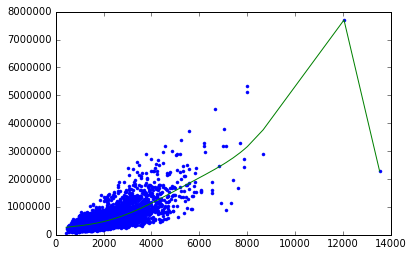

In [41]:
plt.plot(poly_set_1['power_1'], poly_set_1['price'],'.',
        poly_set_1['power_1'], model_set_1.predict(poly_set_1),'-')

In [43]:
#set_2
poly_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
set_2_features = poly_set_2.column_names()
poly_set_2['price'] = set_2['price']
model_set_2 = graphlab.linear_regression.create(poly_set_2, target = 'price', features = set_2_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.011641     | 2069212.978547     | 234840.067186 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [44]:
model_set_2.get('coefficients').print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   89836.5077336    |    1677961.1901   |
|   power_1   |  None |   319.806946762    |    9997.9019222   |
|   power_2   |  None |  -0.103315397041   |   25.2922349935   |
|   power_3   |  None | 1.06682476068e-05  |  0.0358798007061  |
|   power_4   |  None | 5.75577097709e-09  | 3.18207878802e-05 |
|   power_5   |  None | -2.54663464754e-13 |  1.8608338365e-08 |
|   power_6   |  None | -1.09641345055e-16 | 7.35876527801e-12 |
|   power_7   |  None | -6.36458441789e-21 | 1.97896850554e-15 |
|   power_8   |  None | 5.52560416916e-25  | 3.56555717807e-19 |
|   power_9   |  None | 1.35082038973e-28  | 3.98876030791e-23 |
|   power_10  |  None | 1.18408188259e-32  |        nan        |
|   power_11  |  None | 1.98348000471e-37  |        nan        |
|   power_12  |  None | -

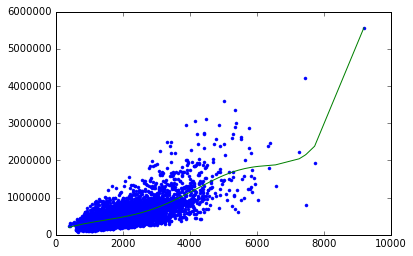

In [45]:
plt.plot(poly_set_2['power_1'], poly_set_2['price'],'.',
        poly_set_2['power_1'], model_set_2.predict(poly_set_2),'-')

In [46]:
#set_3
poly_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
set_3_features = poly_set_3.column_names()
poly_set_3['price'] = set_3['price']
model_set_3 = graphlab.linear_regression.create(poly_set_3, target = 'price', features = set_3_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.009493     | 2269769.506521     | 251460.072754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [47]:
model_set_3.get('coefficients').print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   87317.9795547    |        nan        |
|   power_1   |  None |   356.304911045    |        nan        |
|   power_2   |  None |  -0.164817442809   |        nan        |
|   power_3   |  None | 4.40424992697e-05  |        nan        |
|   power_4   |  None | 6.48234876179e-10  |        nan        |
|   power_5   |  None | -6.75253226587e-13 |        nan        |
|   power_6   |  None | -3.36842592661e-17 |        nan        |
|   power_7   |  None | 3.60999704242e-21  |        nan        |
|   power_8   |  None | 6.46999725625e-25  |        nan        |
|   power_9   |  None | 4.23639388865e-29  |        nan        |
|   power_10  |  None | -3.62149427043e-34 |        nan        |
|   power_11  |  None | -4.27119527274e-37 |        nan        |
|   power_12  |  None | -

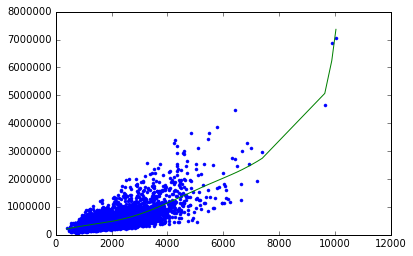

In [48]:
plt.plot(poly_set_3['power_1'], poly_set_3['price'],'.',
        poly_set_3['power_1'], model_set_3.predict(poly_set_3),'-')

In [49]:
#set_4
poly_set_4 = polynomial_sframe(set_4['sqft_living'], 15)
set_4_features = poly_set_4.column_names()
poly_set_4['price'] = set_4['price']
model_set_4 = graphlab.linear_regression.create(poly_set_4, target = 'price', features = set_4_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.011258     | 2314893.173827     | 244563.136754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [50]:
model_set_4.get('coefficients').print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   259020.879455    |   1418633.01576   |
|   power_1   |  None |   -31.7277162089   |   8986.43219604   |
|   power_2   |  None |   0.10970276962    |   23.6372627005   |
|   power_3   |  None | -1.58383847342e-05 |  0.0340870703714  |
|   power_4   |  None | -4.4766062378e-09  |  2.9922677913e-05 |
|   power_5   |  None | 1.13976573483e-12  | 1.65942118384e-08 |
|   power_6   |  None | 1.97669120543e-16  | 5.64257457465e-12 |
|   power_7   |  None | -6.15783678625e-21 | 8.28262236121e-16 |
|   power_8   |  None | -4.88012304078e-24 |        nan        |
|   power_9   |  None | -6.62186781367e-28 |        nan        |
|   power_10  |  None | -2.70631583096e-32 | 5.03468199063e-27 |
|   power_11  |  None |  6.7237041138e-36  | 8.34356427948e-31 |
|   power_12  |  None | 1

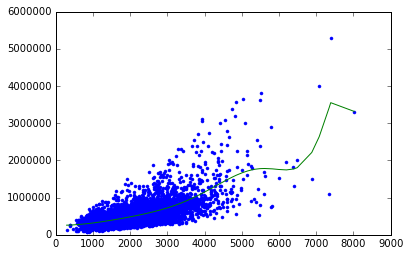

In [51]:
plt.plot(poly_set_4['power_1'], poly_set_4['price'], '.',
        poly_set_4['power_1'], model_set_4.predict(poly_set_4), '-')

### Selecting a Polynomial Degree

Split the sales dataset 3-way into training set, test set, and validation

In [52]:
(training_and_validation, testing) = sales.random_split(0.9, seed=1)
(training, validation) = training_and_validation.random_split(0.5, seed=1)

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [119]:
def rss_by_degree(data):

    # initialize the degree
    degree = 1

    # initialize the dictionary
    degree_rss = {}

    for degree in range(1, 16):

        # built a polynomial sframe
        poly_data = polynomial_sframe(training['sqft_living'], degree)

        # get the features
        poly_features = poly_data.column_names()

        # copy the target
        poly_data['price'] = training['price']

        # build the model
        poly_model = graphlab.linear_regression.create(poly_data, target='price', features=poly_features, validation_set=None, 
                                                       verbose=False)
        # calculate RSS
        residual_list = poly_model.predict(polynomial_sframe(data['sqft_living'], degree)) - data['price']
        residual_squares = residual_list * residual_list
        residual_sum_of_squares = residual_squares.sum()

        # add degree and RSS to dictionary
        degree_rss[degree] = residual_sum_of_squares
        
    return degree_rss

### Run function on validation set

In [123]:
validation_rss = rss_by_degree(validation)

**Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

In [124]:
validation_rss

{1: 676709775198048.2,
 2: 607090530698013.5,
 3: 616714574532759.4,
 4: 609129230654382.6,
 5: 599177138583682.0,
 6: 589182477809203.6,
 7: 591717038417878.2,
 8: 601558237776796.1,
 9: 612563853988437.0,
 10: 621744288936065.0,
 11: 627012012703947.6,
 12: 627757914772014.2,
 13: 624738503262080.4,
 14: 619369705904740.5,
 15: 613089202413658.9}

In [125]:
min(validation_rss, key=validation_rss.get)

6

### Run function on test set

In [126]:
test_rss = rss_by_degree(testing)

**Which degree (1, 2, …, 15) had the lowest RSS on Test data?**

In [127]:
test_rss

{1: 129030470094700.11,
 2: 125190117212860.08,
 3: 125939457007405.75,
 4: 127147719016435.25,
 5: 127037730210195.66,
 6: 125529337847968.73,
 7: 124608773610140.3,
 8: 124458964534447.84,
 9: 124525299776491.19,
 10: 124602928485211.28,
 11: 124641733743965.1,
 12: 124646108317087.55,
 13: 124632209805092.0,
 14: 124612578389305.67,
 15: 124593903712855.17}

In [128]:
min(test_rss, key=test_rss.get)

8

**What is the RSS on TEST data for the model with the degree selected from Validation data?**

In [129]:
test_rss.get(6)

125529337847968.73